In [30]:
#Import libraries, read and show head datasets.

import numpy as np
import pandas as pd
import contextily as ctx
from shapely.geometry import Point
import geopandas as gpd
import mapclassify
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
%matplotlib inline

sns.set()

#Read neighbourhood dataset (relation between neighbourhoods_groups and neighbourhoods)
df_neighbourhood = pd.read_csv("C:/Users/Tom/Desktop/airbnb/neighbourhoods.csv")

#Read listings dataset (information about each airBnb listing in Dublin city)
df = pd.read_csv("C:/Users/Tom/Desktop/airbnb/listings.csv", parse_dates=["last_review"])

#Read Dublin City Boundary Shapefile
Dublin = gpd.read_file("C:/Users/Tom/Desktop/airbnb/Dub.shp") #the data is loaded using Geopandas
Dublin["GUID"] = Dublin["GUID"].astype("str") # the data is joined on this axis, so both dataframes need this to be the same type
Dublin.head()

,OBJECTID,GUID,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,...,EDNAME,SA_PUB2011,SMALL_AREA,GEOGID,AREA,CHANGECODE,ESRI_OID,Shape__Are,Shape__Len,geometry
0,1441,4c07d11d-fcf7-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,SD,South Dublin,...,Ballinascorney,267006001,267006001,A267006001,0,0,1441,2.209198e+07,27324.908162,"POLYGON ((705578.232 726164.183, 705799.880 72..."
1,1442,4c07d11d-fcf8-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,SD,South Dublin,...,Bohernabreena,267035001,267035001,A267035001,0,0,1442,2.774679e+07,24802.292015,"POLYGON ((708915.375 724026.117, 708917.182 72..."
2,1443,4c07d11d-fcf9-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,SD,South Dublin,...,Newcastle,267107002,267107002,A267107002,0,0,1443,1.322554e+07,22942.487237,"POLYGON ((702768.844 730967.191, 702706.983 73..."
3,1445,4c07d11d-fcfb-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,DR,DÃºn Laoghaire-Rathdown,...,Glencullen,267092001,267092001,A267092001,0,0,1445,1.122681e+07,15463.891869,"POLYGON ((718173.661 721135.335, 718375.272 72..."
4,1450,4c07d11d-fd00-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,FL,Fingal,...,The Ward,267158009,267158009/02,A267158009,0,2,1450,1.184491e+07,24186.034898,"POLYGON ((709581.311 746592.686, 709964.383 74..."


C:\Users\Tom\Anaconda3\envs\python_foundation\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: plot_polygon_collection is intended for internal use only, and will be deprecated.
  if __name__ == '__main__':


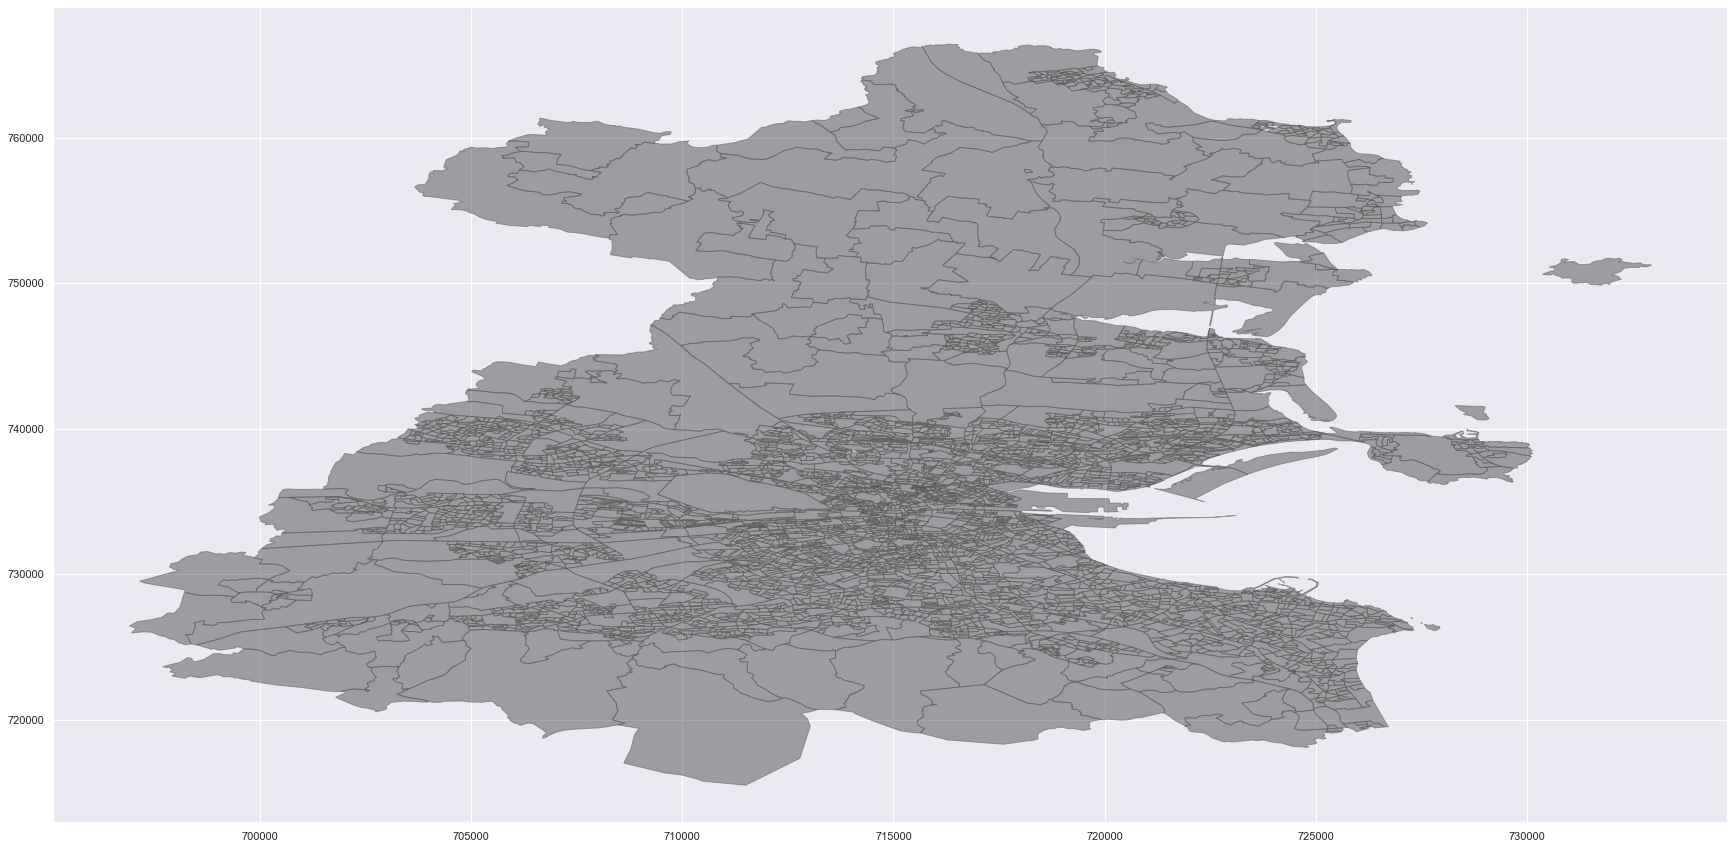

In [5]:

# Plot a map to verify shapefile is correct

f, ax = plt.subplots(figsize=(30,15))
gpd.plotting.plot_polygon_collection(ax,
                                     Dublin['geometry'],
                                     linewidth=0.9,
                                     edgecolor='#B9EBE3',
                                    alpha=0.5,
                                    color='#525252');

<AxesSubplot:>

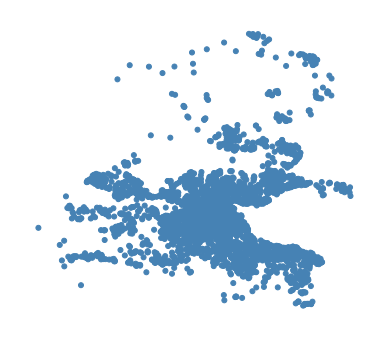

In [4]:
#Plot the airbnb location point data to verify it relates to the Dublin boundary
df['geometry'] = list(zip(df.longitude, df.latitude))
df['geometry'] = df['geometry'].apply(Point)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')
import geoplot as gplt
ax = gplt.polyplot(Dublin)
gplt.pointplot(geo_df, ax=ax)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,percent_vacant,geometry
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,58,3,227,2020-06-03,1.97,3,138,38,POINT (-6.25813 53.28995)
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-11-05,0.06,1,300,82,POINT (-6.31992 53.30110)
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,56,3,182,2020-09-03,1.61,3,239,65,POINT (-6.25618 53.29178)
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.98,3,208,57,POINT (-6.22075 53.33648)
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,38,2,311,2020-09-02,3.03,3,297,81,POINT (-6.23547 53.39027)


<AxesSubplot:>

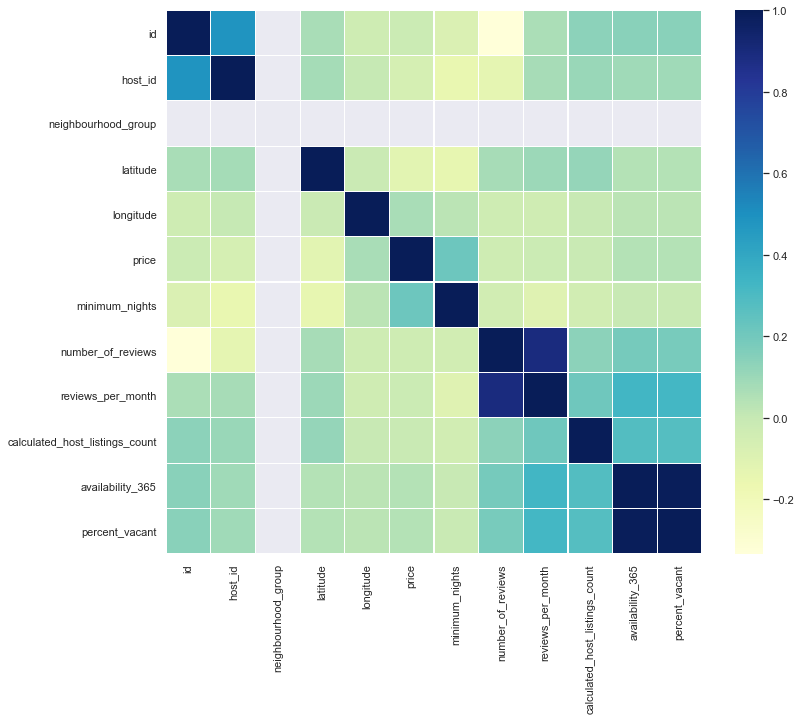

In [6]:
#Correlation between Dublin Air BnB listing variables
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [7]:
#Determining the earliest and latest review date
df['last_review'] = pd.to_datetime(df['last_review'])
oldest_date = df['last_review'].min()
newest_date = df['last_review'].max()
print(oldest_date)
print(newest_date)

2013-06-24 00:00:00
2020-12-08 00:00:00


In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,percent_vacant,geometry
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,58,3,227,2020-06-03,1.97,3,138,38,POINT (-6.25813 53.28995)
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-11-05,0.06,1,300,82,POINT (-6.31992 53.30110)
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,56,3,182,2020-09-03,1.61,3,239,65,POINT (-6.25618 53.29178)
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.98,3,208,57,POINT (-6.22075 53.33648)
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,38,2,311,2020-09-02,3.03,3,297,81,POINT (-6.23547 53.39027)


In [9]:
#As there is no information held in the neighbourhood group column, it is good practice to drop this column now
del df['neighbourhood_group']

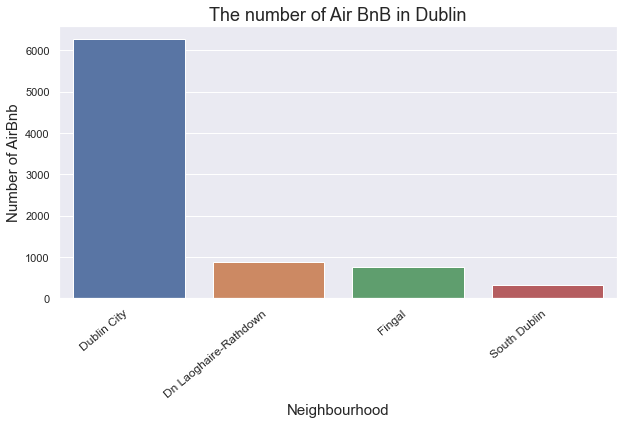

Dublin City              6265
Dn Laoghaire-Rathdown     878
Fingal                    765
South Dublin              325
Name: neighbourhood, dtype: int64

In [10]:
#Show number of listings by neighbourhood
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='neighbourhood', data=df, order = df.neighbourhood.value_counts().sort_values(ascending=False).index)
ax.set_xlabel('Neighbourhood', weight='normal', size=15)
ax.set_ylabel('Number of AirBnb', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=12)
plt.title('The number of Air BnB in Dublin', fontsize=18)

plt.show()

df.neighbourhood.value_counts().sort_values(ascending=False)

C:\Users\Tom\Anaconda3\envs\python_foundation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


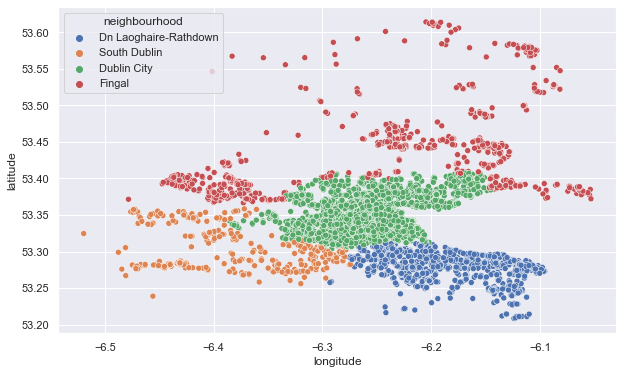

In [11]:
#Visualization of bookings in Dublin County (by latitude and longitude columns)
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood)
plt.ioff()

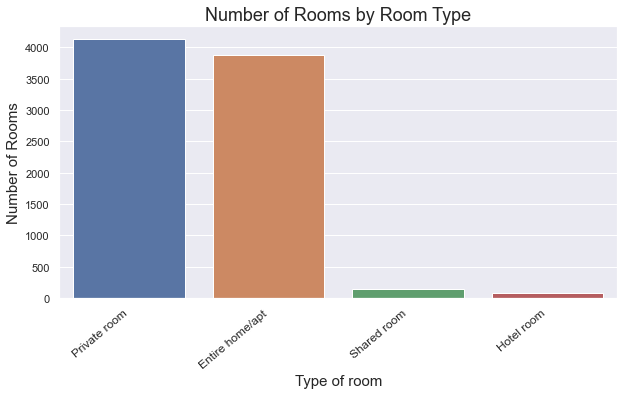

Private room       4131
Entire home/apt    3877
Shared room         147
Hotel room           78
Name: room_type, dtype: int64

In [12]:
#Data trends by number of room types 
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='room_type', data=df)
plt.title('Number of Rooms by Room Type', fontsize=18)

#set the axes
ax.set_xlabel('Type of room', weight='normal', size=15)
ax.set_ylabel('Number of Rooms', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size =12)

plt.show()

df.room_type.value_counts()

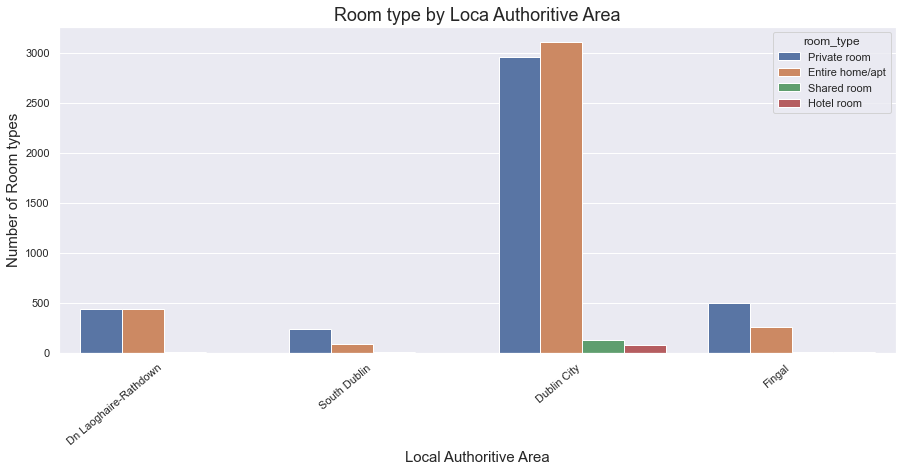

In [13]:
#The number and type of rooms by Local Authoritive Area (Neighbourhood)
plt.figure(figsize = (15, 6))
ax = sns.countplot(x='neighbourhood', hue='room_type', data=df)

#set the axes
ax.set_xlabel('Local Authoritive Area', weight='normal', size=15)
ax.set_ylabel('Number of Room types', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.title('Room type by Loca Authoritive Area', fontsize=18)

plt.show()

In [14]:
# Barplot function
def show_barplot(col_x, col_y, x_label, y_label, title_, ci):
    
    #Standard sizes
    plt.figure(figsize = (10, 6))
    #Draw plot
    ax = sns.barplot(col_x, col_y, ci=ci)
    #Set the axes
    ax.set_xlabel(x_label, weight='normal', size=15)
    ax.set_ylabel(y_label, weight='normal', size=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size= 12)
    #Set tittle
    plt.title(title_, fontsize=18)
    #Show plot
    plt.show()

C:\Users\Tom\Anaconda3\envs\python_foundation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


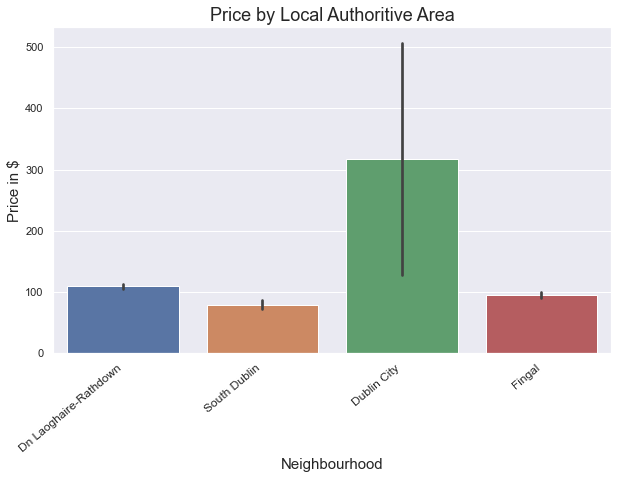

In [15]:
#The relationship between the Air BnB price and Local Authoritive Area (District)
show_barplot(df.neighbourhood, df.price, 'Neighbourhood', 'Price in $', 'Price by Local Authoritive Area', 80)

C:\Users\Tom\Anaconda3\envs\python_foundation\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


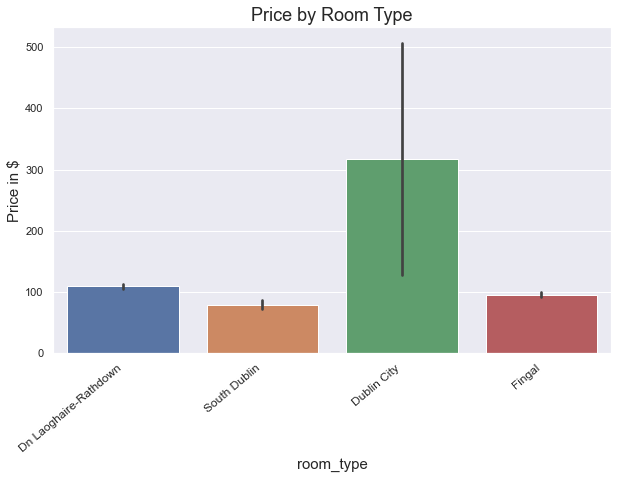

In [16]:
#Show relationship between price and Room Type
show_barplot(df.neighbourhood, df.price, 'room_type', 'Price in $', 'Price by Room Type', 80)

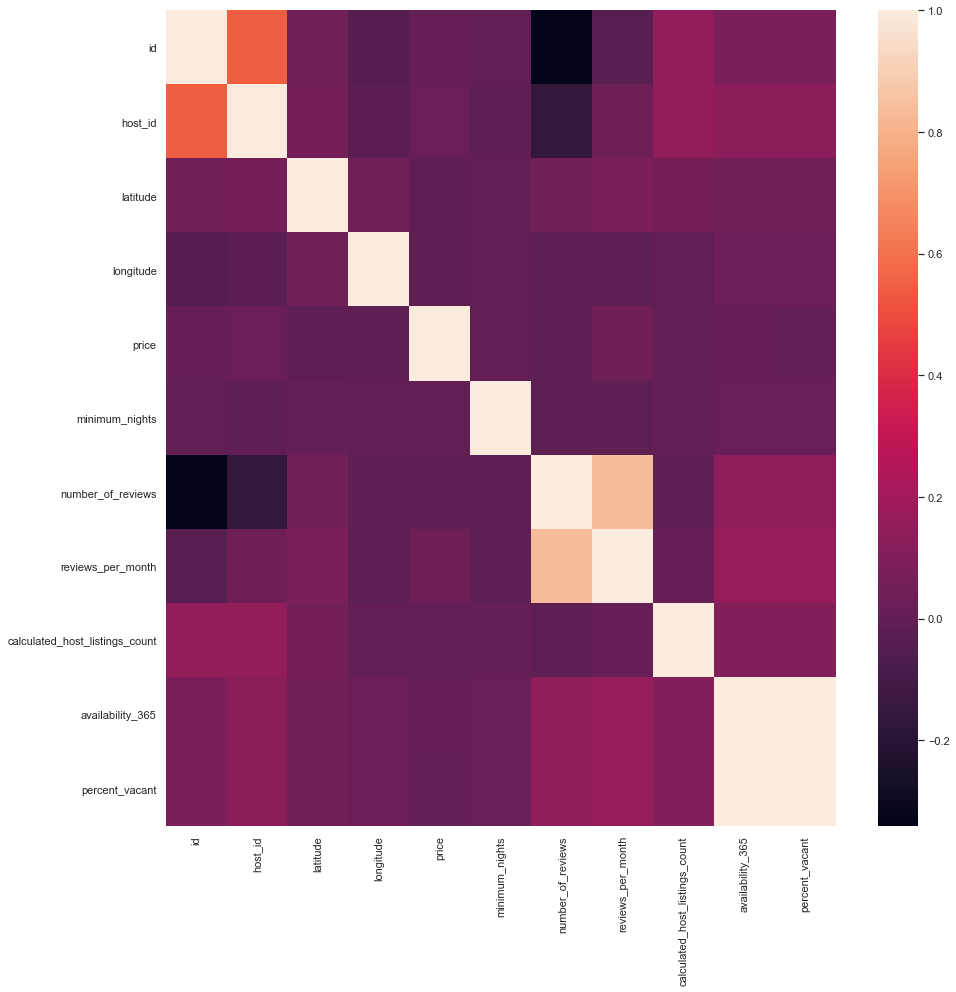

In [17]:
#Variable correlation in the listings table
plt.figure(figsize=(15,15));
sns.heatmap(df.corr());
plt.savefig("sns_heatmap.png", bbox_inches='tight', pad_inches=0.1)

In [5]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
crs = Dublin.crs
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [6]:
geo_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,percent_vacant,geometry
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,58,3,227,2020-06-03,1.97,3,138,38,POINT (-6.25813 53.28995)
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-11-05,0.06,1,300,82,POINT (-6.31992 53.30110)
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,56,3,182,2020-09-03,1.61,3,239,65,POINT (-6.25618 53.29178)
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.98,3,208,57,POINT (-6.22075 53.33648)
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,38,2,311,2020-09-02,3.03,3,297,81,POINT (-6.23547 53.39027)


In [19]:
# Check that coordinates are the same
geo_df.crs
Dublin.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - Ireland (Republic and Ulster) - onshore
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
#Choropleth of the relationship between price and rating by Neighbourhood (District)

# Mean price and std by neighbourhood (district)
myD = df.groupby(['neighbourhood'])
agg = pd.core.groupby.GroupBy.aggregate
myD_av_price = myD['price'].agg(np.mean)
myD_std_price = myD['price'].agg(np.std)

# Mean vacancy rate
myD = df.groupby(['neighbourhood'])
agg = pd.core.groupby.GroupBy.aggregate
myD_av_value_eval = myD['percent_vacant'].agg(np.mean)
myD_std_value_eval = myD['percent_vacant'].agg(np.std)

# Number of airbnbs
myD = df.groupby(['neighbourhood'])
agg = pd.core.groupby.GroupBy.aggregate
myD_count = myD['id'].agg('count')

In [8]:
#A dataframe is created with mean and std of price, overall rating, and location rating
mean_std_df = pd.DataFrame({'neighbourhood':myD_std_price.index,
                            'count': myD_count.values,
                            'mean_price':myD_av_price.values, 
                            'mean_price':myD_std_price.values,
                            'mean_vacancy_rate':myD_av_value_eval.values,
                           'AirBnB_Count':myD_std_value_eval.values})
mean_std_df

,neighbourhood,count,mean_price,mean_vacancy_rate,AirBnB_Count
0,Dn Laoghaire-Rathdown,878,95.605729,23.109339,33.981340
1,Dublin City,6265,14828.877144,18.720032,30.849279
2,Fingal,765,100.643771,30.260131,36.060980
3,South Dublin,325,103.180262,29.326154,36.339595


In [10]:
Dublin.head()

,OBJECTID,GUID,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,...,EDNAME,SA_PUB2011,SMALL_AREA,GEOGID,AREA,CHANGECODE,ESRI_OID,Shape__Are,Shape__Len,geometry
0,1441,4c07d11d-fcf7-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,SD,South Dublin,...,Ballinascorney,267006001,267006001,A267006001,0,0,1441,2.209198e+07,27324.908162,"POLYGON ((705578.232 726164.183, 705799.880 72..."
1,1442,4c07d11d-fcf8-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,SD,South Dublin,...,Bohernabreena,267035001,267035001,A267035001,0,0,1442,2.774679e+07,24802.292015,"POLYGON ((708915.375 724026.117, 708917.182 72..."
2,1443,4c07d11d-fcf9-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,SD,South Dublin,...,Newcastle,267107002,267107002,A267107002,0,0,1443,1.322554e+07,22942.487237,"POLYGON ((702768.844 730967.191, 702706.983 73..."
3,1445,4c07d11d-fcfb-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,DR,DÃºn Laoghaire-Rathdown,...,Glencullen,267092001,267092001,A267092001,0,0,1445,1.122681e+07,15463.891869,"POLYGON ((718173.661 721135.335, 718375.272 72..."
4,1450,4c07d11d-fd00-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,FL,Fingal,...,The Ward,267158009,267158009/02,A267158009,0,2,1450,1.184491e+07,24186.034898,"POLYGON ((709581.311 746592.686, 709964.383 74..."


In [9]:
Dub_arr = Dublin[['SMALL_AREA','geometry']].sort_values(by='SMALL_AREA').reset_index(drop=True)
#Dublin.shift(periods=1)
Dub_arr_area = Dub_arr.copy().to_crs('epsg:2157')
Dub_arr_area.crs
crs = Dub_arr.crs #{'epsg:2157','no_defs': True}
geo_df_arr = gpd.GeoDataFrame(mean_std_df, crs=crs, geometry=Dub_arr['geometry'])
Dub_arr['centroid'] = Dub_arr['geometry'].centroid
Dub_arr['area']=Dub_arr_area['geometry'].area/10**6
geo_df_arr = pd.concat([geo_df_arr,Dub_arr[['centroid','area']]], axis=1)
geo_df_arr['density']=geo_df_arr['count']/geo_df_arr['area']

In [10]:
geo_df_arr

,neighbourhood,count,mean_price,mean_vacancy_rate,AirBnB_Count,geometry,centroid,area,density
0,Dn Laoghaire-Rathdown,878.0,95.605729,23.109339,33.981340,"POLYGON ((716628.671 740854.347, 716603.718 74...",POINT (716577.285 740831.126),0.005622,156167.969128
1,Dublin City,6265.0,14828.877144,18.720032,30.849279,"POLYGON ((716557.068 740930.106, 716532.095 74...",POINT (716503.582 740922.343),0.010875,576084.461124
2,Fingal,765.0,100.643771,30.260131,36.060980,"POLYGON ((716572.347 740990.736, 716534.965 74...",POINT (716478.857 741047.510),0.019164,39918.287651
3,South Dublin,325.0,103.180262,29.326154,36.339595,"POLYGON ((716415.507 741045.204, 716415.316 74...",POINT (716401.621 740980.259),0.008355,38900.839411
4,NaN,NaN,NaN,NaN,NaN,None,POINT (716343.255 740984.600),0.008465,NaN
...,...,...,...,...,...,...,...,...,...
4877,NaN,NaN,NaN,NaN,NaN,None,POINT (715254.799 732680.506),0.009059,NaN
4878,NaN,NaN,NaN,NaN,NaN,None,POINT (715169.320 732809.095),0.011369,NaN
4879,NaN,NaN,NaN,NaN,NaN,None,POINT (715285.140 732923.587),0.023319,NaN
4880,NaN,NaN,NaN,NaN,NaN,None,POINT (715163.849 732693.802),0.009876,NaN


In [11]:
#Only relevant rows should be kept, Any row with a 'NaN' value is dropped
final_df = geo_df_arr.dropna()

In [12]:
final_df.head

<bound method NDFrame.head of            neighbourhood   count    mean_price  mean_vacancy_rate  \
0  Dn Laoghaire-Rathdown   878.0     95.605729          23.109339   
1            Dublin City  6265.0  14828.877144          18.720032   
2                 Fingal   765.0    100.643771          30.260131   
3           South Dublin   325.0    103.180262          29.326154   

   AirBnB_Count                                           geometry  \
0     33.981340  POLYGON ((716628.671 740854.347, 716603.718 74...   
1     30.849279  POLYGON ((716557.068 740930.106, 716532.095 74...   
2     36.060980  POLYGON ((716572.347 740990.736, 716534.965 74...   
3     36.339595  POLYGON ((716415.507 741045.204, 716415.316 74...   

                        centroid      area        density  
0  POINT (716577.285 740831.126)  0.005622  156167.969128  
1  POINT (716503.582 740922.343)  0.010875  576084.461124  
2  POINT (716478.857 741047.510)  0.019164   39918.287651  
3  POINT (716401.621 740980.259) 

In [13]:
params = {'legend.fontsize': 20}
plt.rcParams.update(params)

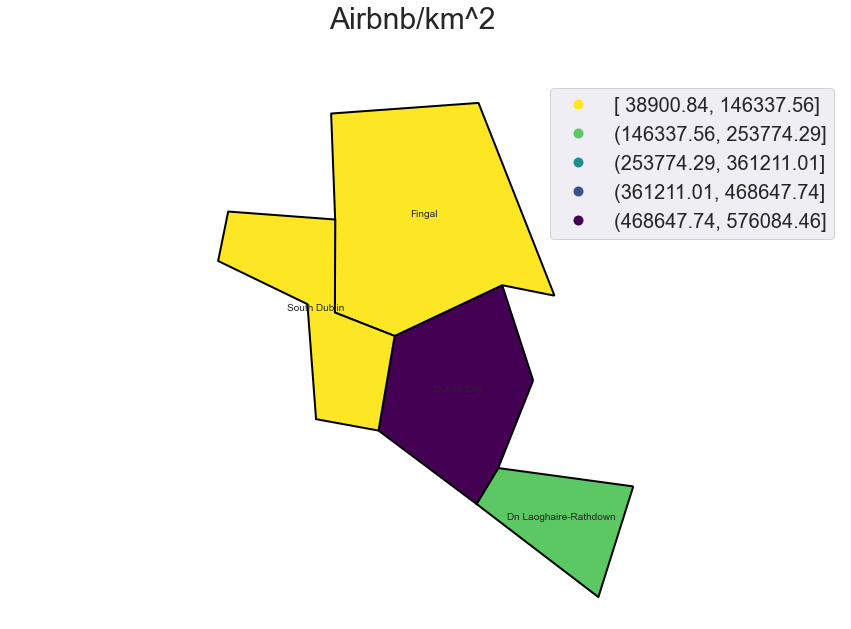

In [15]:
f, ax = plt.subplots(figsize=(15,10));

final_df.plot(column='density', ax = ax, scheme='equal_interval', 
                cmap='viridis_r', legend=True, linewidth=2, edgecolor='black'
               );
for arr in final_df.iterrows():
    ax.text(arr[1]['centroid'].x, 
            arr[1]['centroid'].y, 
            arr[1]['neighbourhood'], 
            horizontalalignment='center', 
            fontsize=10)
# viridis_r

ax.set_axis_off();
f.suptitle('Airbnb/km^2',fontsize=30);
plt.axis('equal');

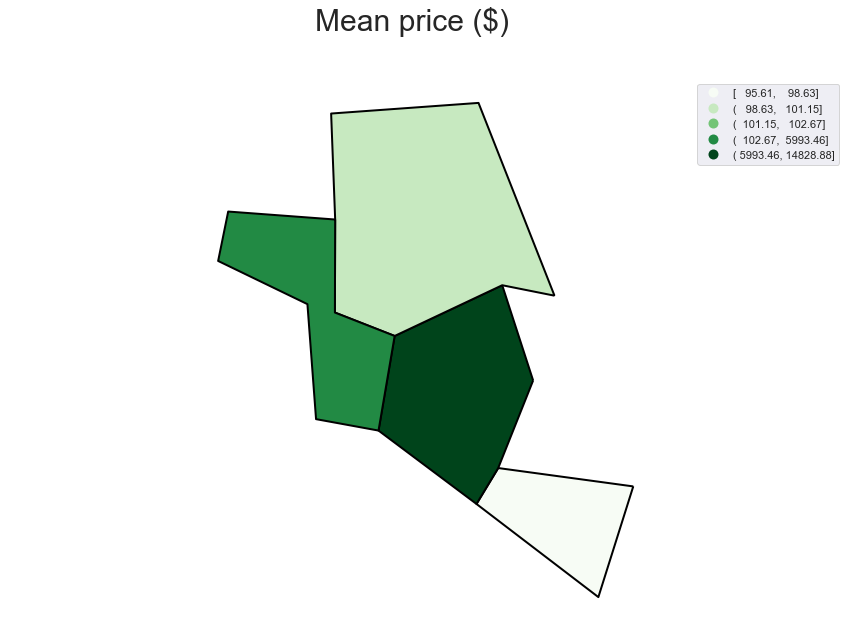

In [25]:
f, ax = plt.subplots(figsize=(15,10));

final_df.plot(column= 'mean_price', ax = ax, scheme='Quantiles', 
                cmap='Greens', legend=True, linewidth=2, edgecolor='black'
                );

# viridis_r

ax.set_axis_off();
f.suptitle('Mean price ($)',fontsize=30);
plt.axis('equal');